# Descripcion del Proyecto

Zuber es una empresa de viajes compartidos que se esta lanzando en Chicago. Se busca encontrar patrones en la información disponible y comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

## Analisis Exploratorio de Datos

Se cuenta con archivos adicionales. Se debe:
 - Importar los archivos
 - Estudiar los datos
 - Revisar los tipos de dato
 - Identificar los 10 barrios mas populares como destino
 - Graficar: Empresas de taxi vs numero de viajes, para los 10 barrios mas populares
 - Sacar conlcusiones y explicar resultados

### Importar archivos

In [1]:
# Se importan las librerias
from matplotlib import pyplot as plt #para graficos
import scipy.stats as st #para pruebas de hipotesis
import pandas as pd #para analisis de datos

In [2]:
# Se importan los archivos
companies = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
airport = pd.read_csv('/datasets/project_sql_result_07.csv')


In [3]:
# Se muestran los DF de la seccion
print('Companies:')
display(companies.head())
print('Neighborhoods:')
neighborhoods.head()


Companies:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Neighborhoods:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Los archivos fueron importados sin inconvenientes.

### Estudiar los datos

In [4]:
# Se muestra informacion del df companies
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Se muestran estadisticos del df companies
companies.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
# Se muestra informacion del df neighborhoods
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Se muestran estadisticos del df companies
neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Los df no cuentan con datos nulos aparentes ni con valores en 0. Todo se ve en orden.

### Revisar tipos de dato

- El DF companies cuenta con tipo de dato object para los nombres e int para el numero de viajes, son los tipos de dato correctos para guardar esa informacion
- El DF neighborhoods cuenta con tipo de dato object para los nombres y float para el promedio de viajes, son los tipos de dato correctos para guardar esa informacion

### Identificar los 10 destinos mas populares

In [8]:
# Se ordenan los datos del df neighborhoods por numero promedio de viajes y se fitran los 10 primeros vecindarios
top10_neighborhoods = neighborhoods.sort_values(by='average_trips', ascending=False).head(10).iloc[:,0].to_list()
top10_neighborhoods

['Loop',
 'River North',
 'Streeterville',
 'West Loop',
 "O'Hare",
 'Lake View',
 'Grant Park',
 'Museum Campus',
 'Gold Coast',
 'Sheffield & DePaul']

Se ordenaron los datos y se guardaron los nombres de los 10 barrios mas populares como destino en una lista.

### Graficas

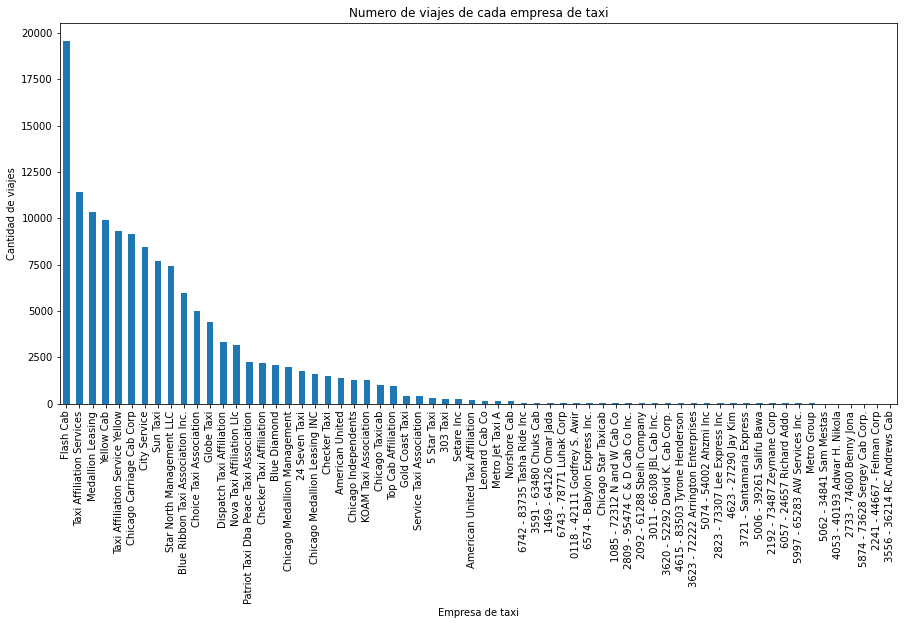

In [9]:
# Se grafican el numero de viajes de cada empresa de taxis
companies.plot(kind='bar',
               x='company_name',
               figsize=(15,7),
               legend=False)
plt.xlabel('Empresa de taxi')
plt.ylabel('Cantidad de viajes')
plt.title('Numero de viajes de cada empresa de taxi')
plt.show()

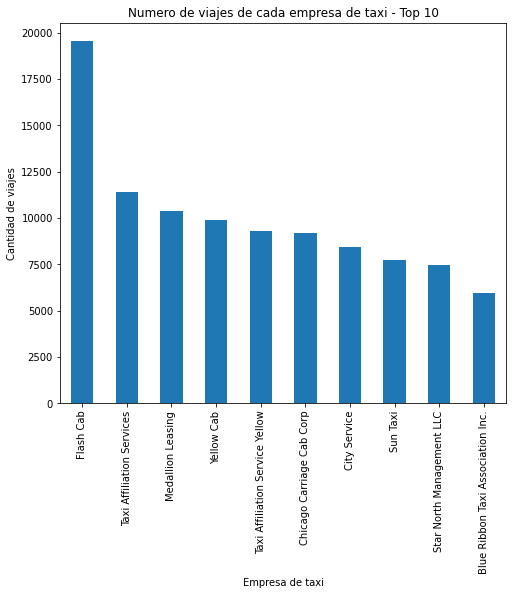

In [10]:
# Se grafican el numero de viajes de cada empresa de taxis
companies.head(10).plot(kind='bar',
               x='company_name',
               figsize=(8,7),
               legend=False)
plt.xlabel('Empresa de taxi')
plt.ylabel('Cantidad de viajes')
plt.title('Numero de viajes de cada empresa de taxi - Top 10')
plt.show()

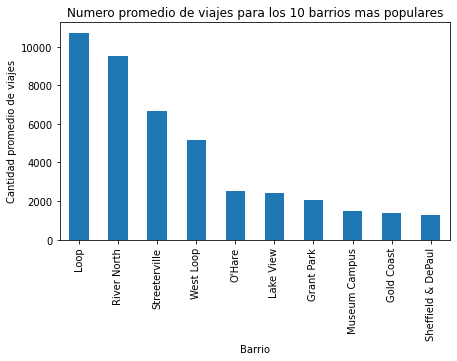

In [11]:
# Se grafican los viajes a los 10 barrios mas populares
neighborhoods.sort_values(by='average_trips', ascending=False).head(10).plot(kind='bar',
                                                                             x='dropoff_location_name',
                                                                             figsize=(7,4),
                                                                             legend=False)
plt.xlabel('Barrio')
plt.ylabel('Cantidad promedio de viajes')
plt.title('Numero promedio de viajes para los 10 barrios mas populares')
plt.show()

### Conclusiones y Explicaciones de los graficos

Se elaboraron graficos de barra para observar la empresas de taxi con mayor cantidad de viajes y los barrios destino con mayor cantidad de viajes promedio.

Para los dias en cuestion, podemos observar que hay una clara empresa de taxis lider (Flash Cab) y luego empresas que compiten entre ellas. Se pueden observar lo que vendrian a ser dos pendientes de aprox. 10000 carreras a 2500 carreras y de aprox. 2500 carreras a casi 0 carreras. A su vez, mas de la mitad de empreasas de taxi cuentan con muy pocas o ninguna carrera.

En noviembre del 2017, podemos ver que Loop es el destino mas popular con mas de 10000 viajes en promedio, seguido de River North con mas de 9000 viajes en promedio. Dentro de los 10 destinos mas populares, la mitad inferior cuenta con entre 1000 a 2000 viajes en promedio.

### Conclusiones Analisis Exploratorio de Datos

Los datasets importados se encontraban limpios y estructurados de forma apropiada, con tipos de dato correctos para cada columna.

Del analisis podemos concluir que para los dias en cuestion, la empresa Flash Cab fue la lider con casi 20000 viajes y que la mitad de empresas de taxi casi no cuentan con viajes para esas fechas.

Ademas, para el mes en cuestion Loop fue el destino mas popular con mas de 10000 viajes en promedio, mientras que la mitad inferior de los 10 destinos mas populares cuenta con entre 1000 y 2000 viajes en promedio.

## Prueba de Hipotesis

Probar la hipotesis: 
    "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
    
Explicar:
 - Nivel de significacion alfa escogido
 - Planteamiento de la Hipotesis Nula y Alternativa
 - Criterio para probar la hipotesis

### Planteamiento

- Hipotesis Nula (H0): La duracion promedio desde Loop hasta el Aeropuerto de O'Hare es la misma los sabados con buen clima que los sabados con mal clima.
- Hipotesis Alternativa (H1): La duracion promedio desde Loop hasta el Aeropuerto de O'Hare cambia dependiendo del clima
- Nivel se significacion (alpha): probabilidad de un falso negativo (error tipo 1), seteado en 5% convencionalmente

Se plantearon las hipotesis nula y alternativa y se selecciona el nivel de significacion.

### Prueba

In [12]:
# Se muestran los datos
airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
# Se revisa el df
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
# Se muestran estadisticos
airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [15]:
# Se observa la presencia de trayectos con 0 segundos, lo que no tiene sentido
airport[airport['duration_seconds'] == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [16]:
# Se eliminan dichos trayectos ya que probablemente fueron cancelados
airport = airport[airport['duration_seconds'] != 0]
airport.describe()

,duration_seconds
count,1062.000000
mean,2083.435970
std,755.651796
min,60.000000
25%,1440.000000
50%,1980.000000
75%,2580.000000
max,7440.000000


Luego de cargar los datos y echarles un vistazo, se pudo observar que existian celdas con valor de 0 para algunas duraciones de trayecto. Estas 6 filas fueron eliminadas ya que son pocas y se tratan probablemente de trayectos cancelados. Se observa ahora un valor minimo de 60 segundos para la duracion de los trayectos, lo cual tampoco hace mucho sentido. Estos datos atipicos seran tratados mas adelante.

In [17]:
# Separan los datos segun condiciones climaticas
good = airport[airport['weather_conditions'] == 'Good'][['start_ts', 'duration_seconds']]
bad = airport[airport['weather_conditions'] == 'Bad'][['start_ts', 'duration_seconds']]

print('Good Weather:')
display(good)
print('Bad Weather:')
display(bad)

Good Weather:


,start_ts,duration_seconds
0,2017-11-25 16:00:00,2410.0
1,2017-11-25 14:00:00,1920.0
2,2017-11-25 12:00:00,1543.0
3,2017-11-04 10:00:00,2512.0
4,2017-11-11 07:00:00,1440.0
...,...,...
1060,2017-11-04 14:00:00,2700.0
1062,2017-11-11 06:00:00,1500.0
1064,2017-11-11 10:00:00,1318.0
1065,2017-11-11 13:00:00,2100.0


Bad Weather:


,start_ts,duration_seconds
6,2017-11-04 16:00:00,2969.0
30,2017-11-18 12:00:00,1980.0
34,2017-11-04 17:00:00,2460.0
51,2017-11-04 16:00:00,2760.0
52,2017-11-18 12:00:00,2460.0
...,...,...
1031,2017-11-18 12:00:00,2560.0
1032,2017-11-18 10:00:00,1908.0
1053,2017-11-18 12:00:00,2400.0
1061,2017-11-18 16:00:00,2186.0


In [18]:
# Se muestran los estadisticos para cada condicion climatica
print('Good weather:')
display(good.describe())
print('Bad weather: ')
display(bad.describe())

Good weather:


,duration_seconds
count,882.000000
mean,2013.278912
std,743.565217
min,60.000000
25%,1397.250000
50%,1800.000000
75%,2460.000000
max,7440.000000


Bad weather: 


,duration_seconds
count,180.000000
mean,2427.205556
std,721.314138
min,480.000000
25%,1962.000000
50%,2540.000000
75%,2928.000000
max,4980.000000


De los estadisticos podemos apreciar que existe cierta diferencia entre las duraciones de los viajes dependiendo de las condiciones climaticas. Tenemos una media de alrededor de 2000s para buenas condiciones climaticas y de 2400 para malas condiciones climaticas.

Si bien existe una diferencia en las medias de las muestras, esta esta dentro de la desviacion estandar de aprox. 700s. No es claro aun que exista una diferencia significativa entre las medias.

Observaremos los histogramas y diagramas de caja para tener una mejor vision de los datos.

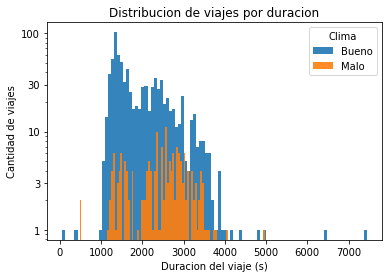

In [19]:
# Se muestran los histogramas
good['duration_seconds'].plot(kind='hist',
                             bins=100,
                             alpha=0.9)
bad['duration_seconds'].plot(kind='hist',
                             bins=100,
                             alpha=0.9)
plt.yscale('log', nonpositive='clip') # permite una mejor visualizacion
plt.yticks(ticks=[1,3,10,30,100], labels=[1,3,10,30,100])
plt.ylabel('Cantidad de viajes')
plt.xlabel('Duracion del viaje (s)')
plt.legend(['Bueno', 'Malo'], title='Clima')
plt.title('Distribucion de viajes por duracion')
plt.show()

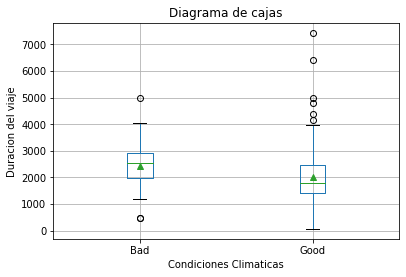

In [20]:
# Se muestran los diagramas de caja
airport.boxplot(column='duration_seconds',
                by='weather_conditions',
                showmeans=True)
plt.xlabel('Condiciones Climaticas')
plt.ylabel('Duracion del viaje')
plt.title('Diagrama de cajas')
plt.suptitle('')
plt.show()

En el histograma observamos ciertas similitudes en forma entre ambas distribuciones. A su vez vemos ciertos viajes con duraciones extranas menores a 500s. Estos podrian ser registros erroneos, mas no podemos obtener mayor informacion.

De los diagramas de caja vemos que existen diferencias mas significativas entre las medianas que entre las medias de las distribuciones. Tambien observamos la presencia de valores atipicos a ser tratados antes de realizar la prueba de hipotesis.

La alta presencia de valores atipicos altos en los viajes con buen clima empuja la media y la acerca a la de los viajes con mal clima. Si ignoramos estos valores puede que las medias sean mas cercanas a las medianas de cada distribucion.

Siendo este el caso, las medianas difieren en un valor bastante mayor (cerca de 1 sigma), lo que podria ser un indicador de que las medias de las poblaciones difieren de forma no despreciable.

In [21]:
# Observamos los viajes con duraciones menores a 500s
print('Good: ')
display(good[good['duration_seconds'] < 500])
print('Bad: ')
display(bad[bad['duration_seconds'] < 500])

Good: 


,start_ts,duration_seconds
15,2017-11-25 13:00:00,60.0
424,2017-11-11 13:00:00,420.0


Bad: 


,start_ts,duration_seconds
203,2017-11-18 00:00:00,480.0
860,2017-11-04 18:00:00,480.0


In [22]:
# Eliminamos viajes con duracion menor a 500s por considerarlos datos muy extranhos y ser pocos
good = good[good['duration_seconds'] >= 500]
bad = bad[bad['duration_seconds'] >= 500]
print(good['duration_seconds'].min(), bad['duration_seconds'].min())

1018.0 1182.0


Observamos que ahora los minimos de ambas distribuciones tienen valores mas razonables y parecidos, no atipicos. Procedemos con el limite superior.

In [23]:
# Observamos los viajes con duraciones mayores a 4000s
print('Good: ')
display(good[good['duration_seconds'] > 4000])
print('Bad: ')
display(bad[bad['duration_seconds'] > 4000])

Good: 


,start_ts,duration_seconds
79,2017-11-11 15:00:00,4800.0
353,2017-11-25 18:00:00,4140.0
354,2017-11-25 11:00:00,7440.0
583,2017-11-11 16:00:00,4980.0
619,2017-11-25 14:00:00,6420.0
646,2017-11-11 13:00:00,4380.0


Bad: 


,start_ts,duration_seconds
110,2017-11-18 13:00:00,4044.0
276,2017-11-18 12:00:00,4980.0


In [24]:
# Eliminamos viajes con duracion mayor a 4000s por considerarlos atipicos y ser pocos
good = good[good['duration_seconds'] <= 4000]
bad = bad[bad['duration_seconds'] <= 4000]
print(good['duration_seconds'].max(), bad['duration_seconds'].max())

3982.0 3779.0


Observamos que ahora los maximos de ambas distribuciones tienen valores parecidos, no atipicos. Procedemos con la prueba de student.

Se procede con una prueba t de student para muestras no relacionadas con varianzas iguales. Esto debido a que los tamanhos de las muestras son diferentes y a que las desviaciones estandar de las muestras son similares.

In [25]:
# Se preparan las listas
trips_good = good['duration_seconds'].to_list()
trips_bad = bad['duration_seconds'].to_list()

# Nivel de significacion
alpha = 0.05

# Prueba de student para dos distribuciones, asumiendo varianzas iguales
results = st.ttest_ind(trips_good, trips_bad, equal_var=True)

# Se determina si se rechaza o acepta Ho
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Se rechaza la hipotesis nula. "
          "Rechazamos que la duracion promedio de los viajes de Loop al aeropuerto de O'Hare "
          "sea independiente del buen o mal clima. "
          "Se acepta la hipotesis alternativa. "
          "Aceptamos que la duracion promedio de los viajes cambia los sabados lluviosos")
else:
    print('No podemos rechazar la hipotesis nula')
        

valor p:  3.070443776922445e-14
Se rechaza la hipotesis nula. Rechazamos que la duracion promedio de los viajes de Loop al aeropuerto de O'Hare sea independiente del buen o mal clima. Se acepta la hipotesis alternativa. Aceptamos que la duracion promedio de los viajes cambia los sabados lluviosos


Se observaron las distribuciones de los datos y sus diagramas de caja. Esto permite obtener una intucion sobre los datos ademas de prepararlos apropiadamente para la prueba de hipotesis. Una prueba de t de studen equivarianza rechaza la hipotesis nula.

### Conclusiones Prueba de Hipotesis

Se plantearon adecuadamente las hipotesis nula y alternativa. La nula supone que no existe cambio en la duracion promedio de los viajes, la alternativa supone que la duracion promedio de los viajes cambia los dias lluviosos. A su vez se establecio el alpha en 5% como es usual.

Se realizo un analisis descriptivo inicial a los datos: se calcularon estadisticos, se elaboraron histogramas y diagramas de caja. Esto permitio realizar una preparacion a los datos previa a las prueba de hipotesis: se eliminaron valores en 0 y valores atipicos.

Se realizo una prueba de hipotesis para muestras independientes (debido a la diferencia en tamanho de las muestras) con varianzas iguales (debido a la similitud entre las desviaciones). Esta prueba concluyo que se rechaza la hipotesis nula y se acepta que la duracion promedio de los viajes aumenta en dias lluviosos con un valor-p de 3e-14. En retrospectiva, el alpha pudo ser mucho menor sin afectar el resultado de la prueba.

Esto concuerda con nuestra intuicion inicial al comparar las medianas de ambas distribuciones en los diagramas de caja. Cabe recalcar que esto no era muy evidente al observar los histogramas. Siempre es positivo utilizar ambas herramientas para que se complementen entre si y nos puedan guiar de forma eficiente hacia el resultado.

## Conclusiones Generales

 - Durante el analisis exploratorio, no se realizo un preprocesamiento.
    Las tablas contaban con tipos de dato correctos y no tenian datos nulos.
 - Se determino que la empresa de taxis con mas viajes durante el 15 y 16 de noviembre fue Flash Cab.
 - Se encontro que el destino mas popular durante el mes de noviembre fue Loop.
 - Para la prueba de hipotesis, se observo que el dataset contenia algunas filas con valores de 0 y menores a 500s. 
    Estos datos fueron eliminados al carecer de sentido y/o ser atipicos y ser pocos.
 - El diagrama de cajas muestra valores atipicos superiores a 4000s. 
   Estos fueron eliminados para que no afecten nuestra prueba de hipotesis.
 - La prueba de hipotesis rechaza la hipotesis nula con un valor-p de 3x10^-14.
   Se acepta que la duracion promedio de los viajes desde Loop al aeropuerto de O'Hare cambia los sabados lluviosos.